In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets

In [2]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

In [3]:
housing_df=pd.DataFrame(data=housing.data,columns=housing.feature_names)
housing_df['HousePrice']=housing.target

In [4]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
housing_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
HousePrice    0
dtype: int64

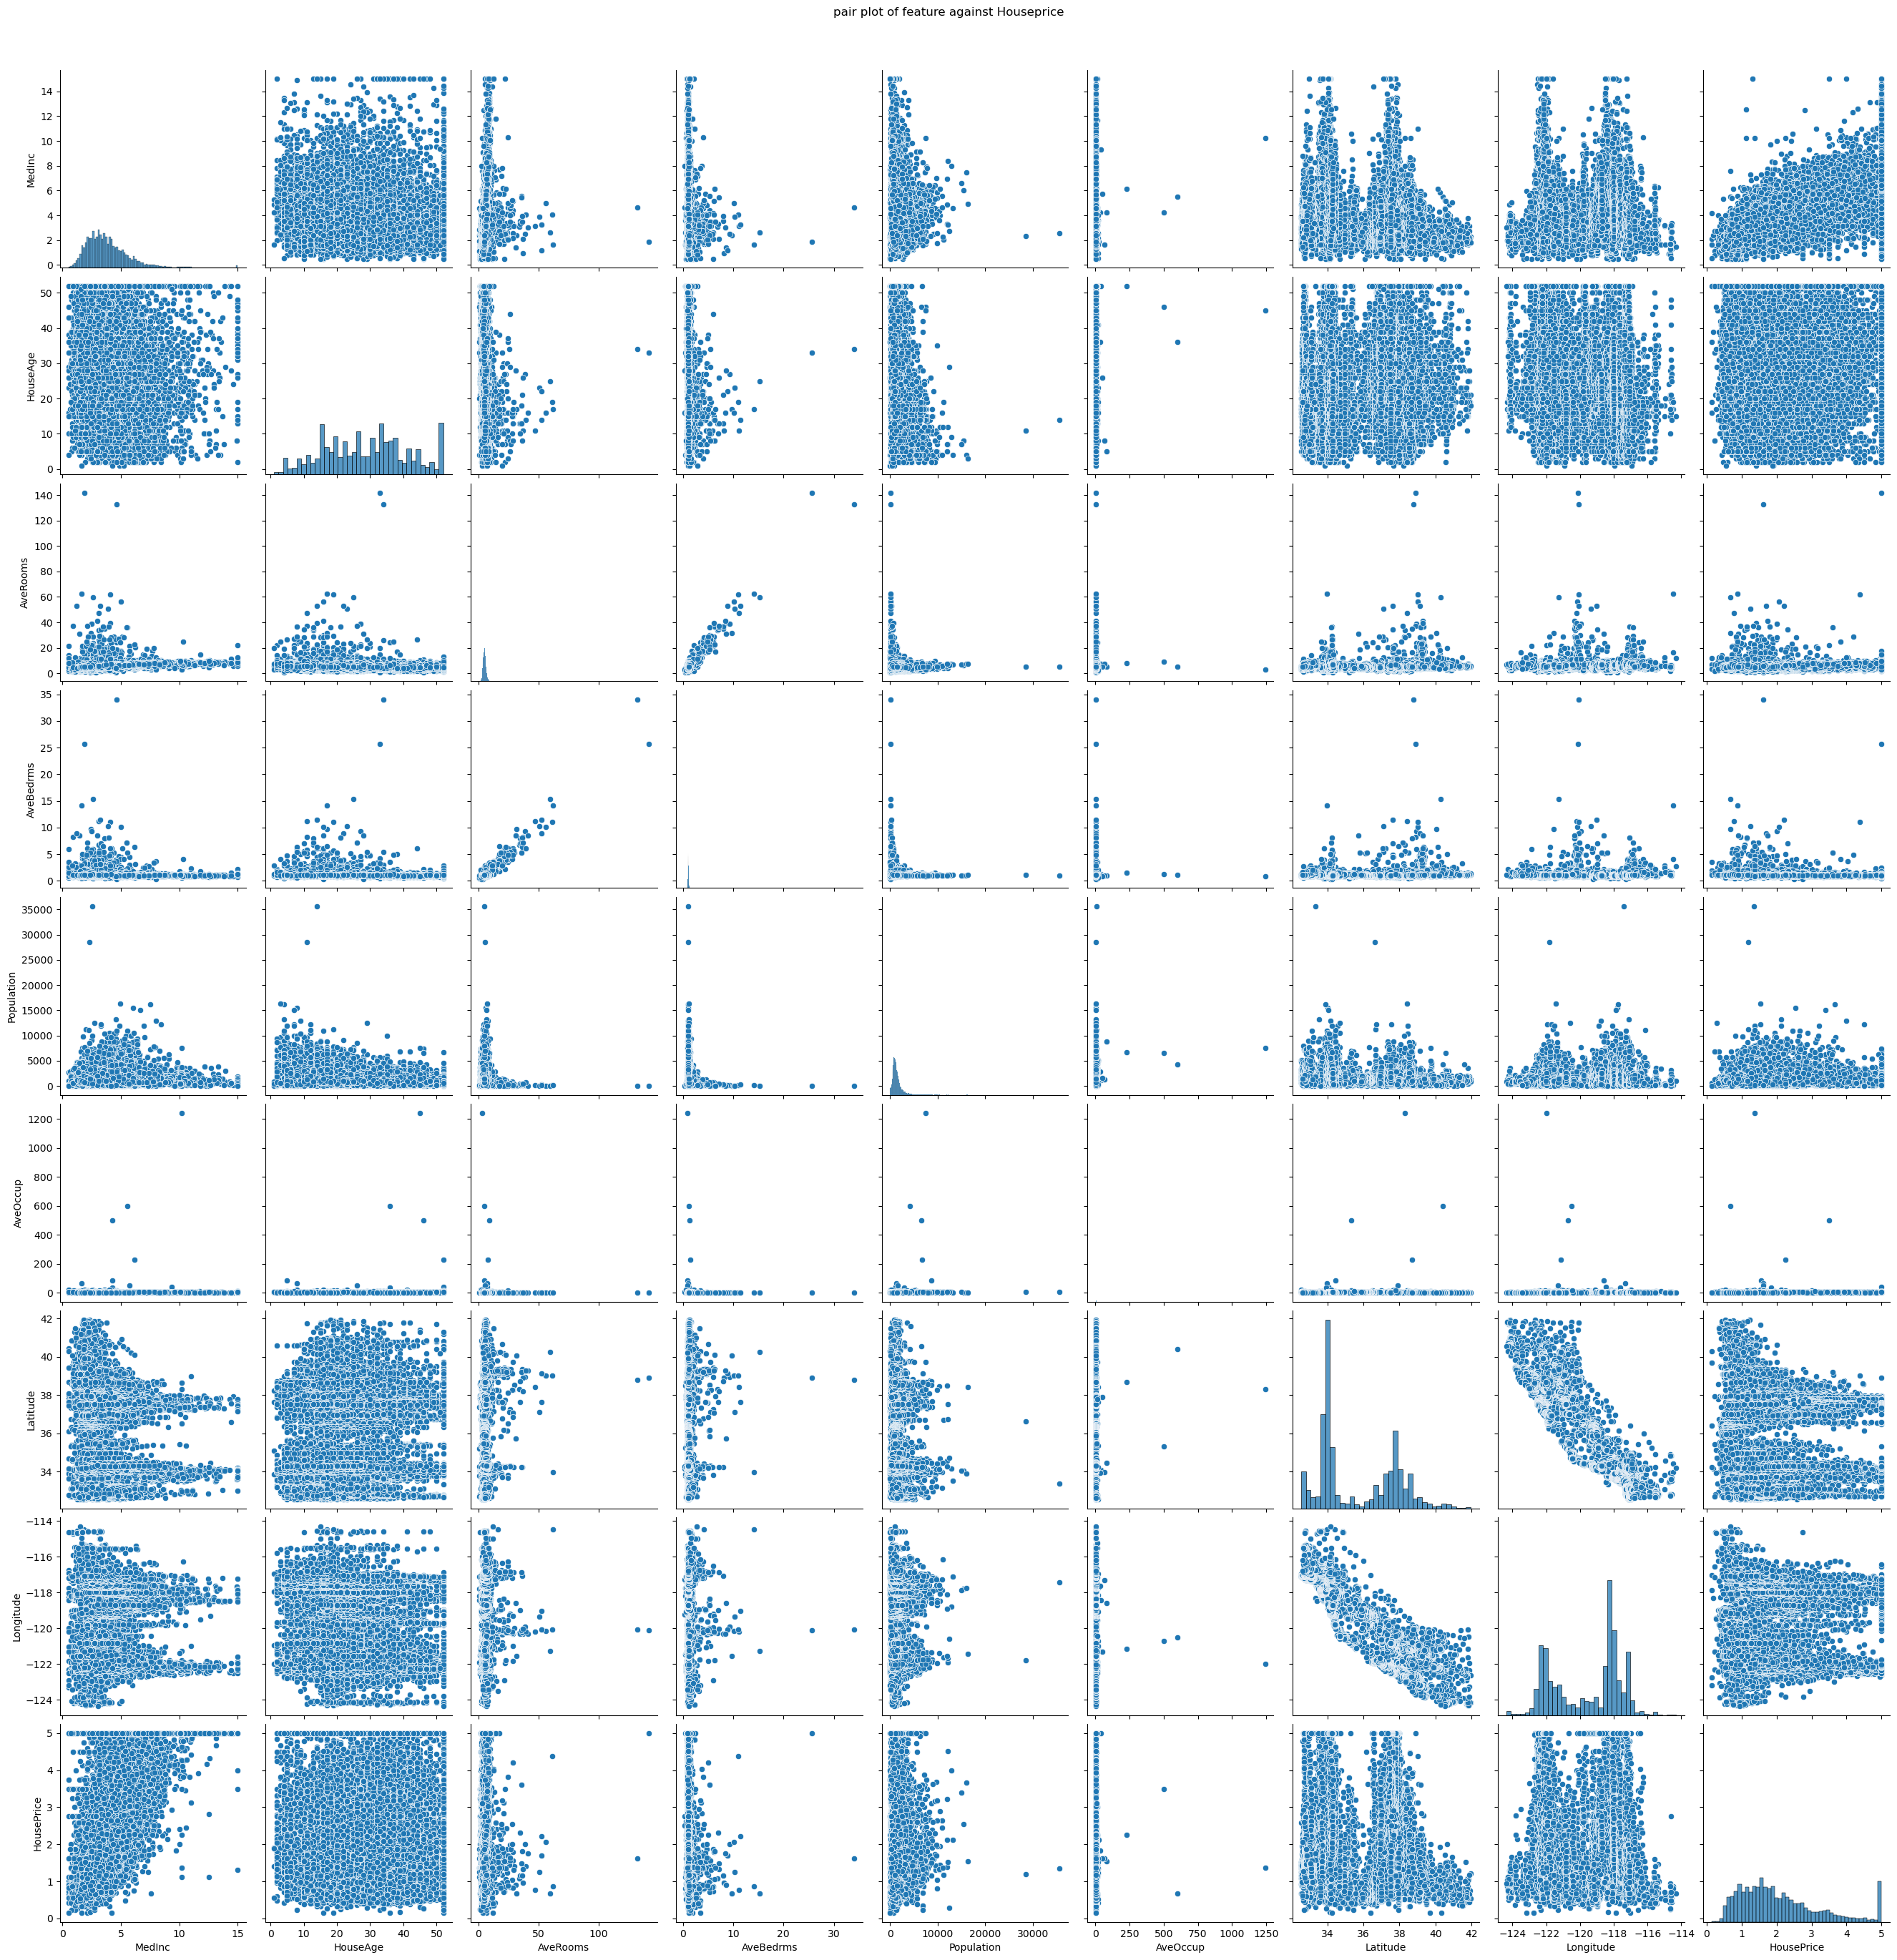

In [7]:
sns.pairplot(housing_df,height=3)
plt.suptitle('pair plot of feature against Houseprice',y=1.02)
plt.show()

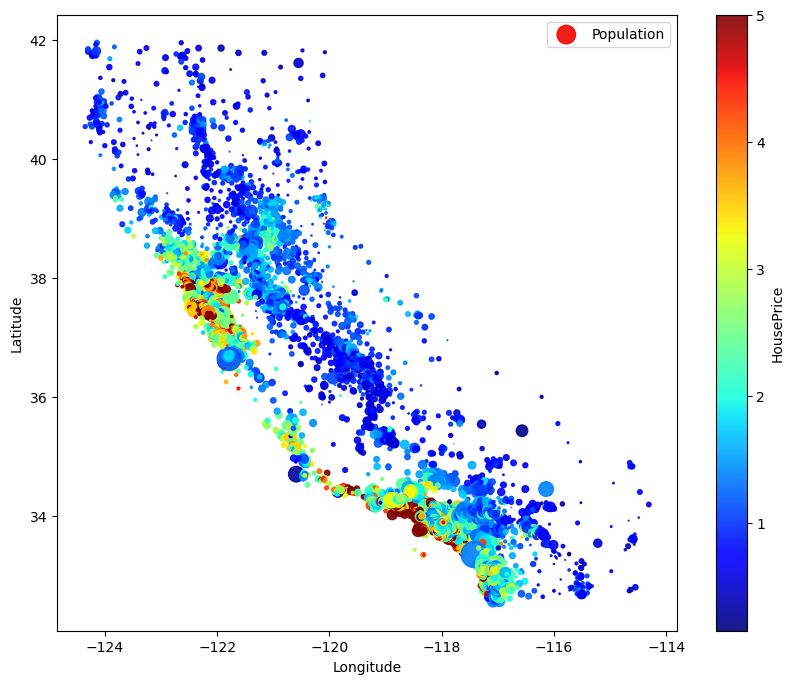

In [8]:
housing_df.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    alpha=0.9,
    s=housing_df['Population']/100,
    label="Population",
    c="HousePrice",
    cmap="jet",
    colorbar=True,
    figsize=(10,8)
)
plt.show()
    

<Axes: >

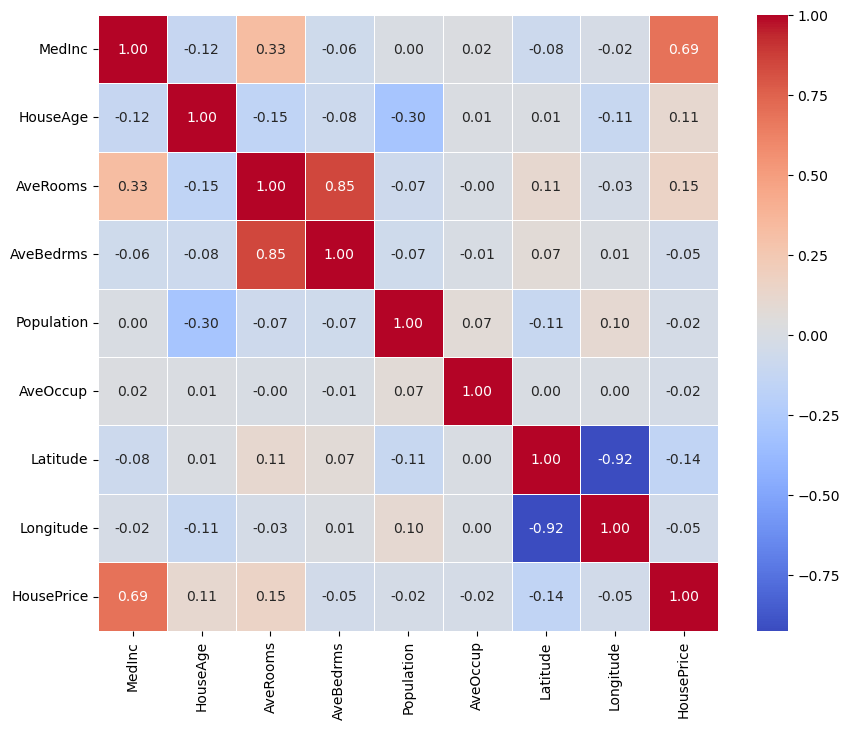

In [9]:
corr=housing_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt="0.2f",linewidth=0.5)

In [10]:
corr["HousePrice"].abs().sort_values(ascending=False)

HousePrice    1.000000
MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
Name: HousePrice, dtype: float64

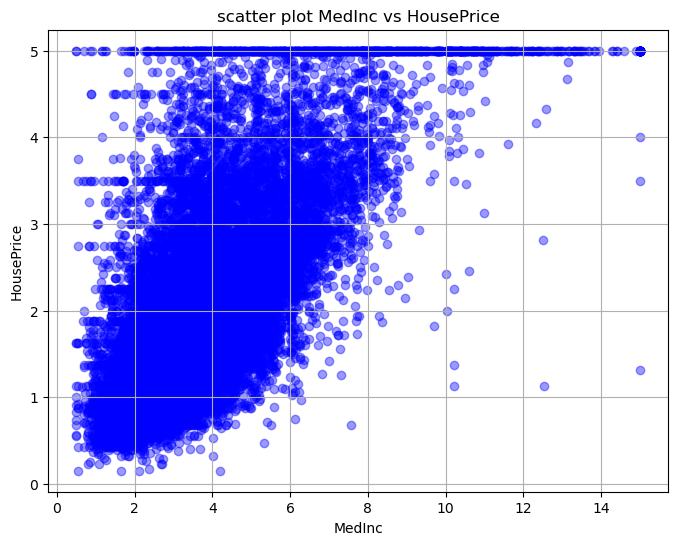

In [11]:
medinc=housing_df['MedInc']
houseprice=housing_df['HousePrice']
plt.figure(figsize=(8,6))
plt.scatter(medinc,houseprice,alpha=0.4,color='blue')
plt.title('scatter plot MedInc vs HousePrice')
plt.xlabel('MedInc')
plt.ylabel('HousePrice')
plt.grid(True)
plt.show()

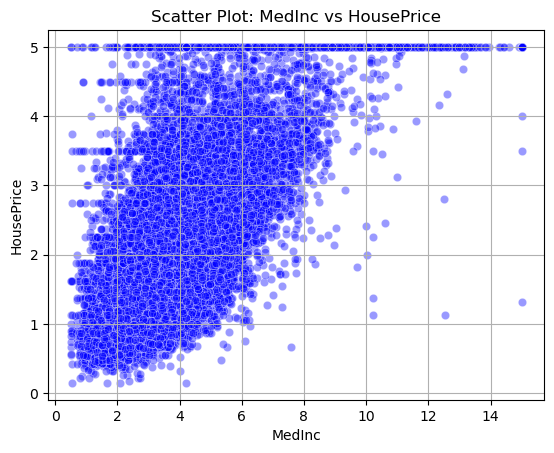

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot using Seaborn
sns.scatterplot(
    data=housing_df,
    x="MedInc",
    y="HousePrice",
    alpha=0.4,
    color="blue"
)

# Adding title, labels, and grid
plt.title('Scatter Plot: MedInc vs HousePrice')
plt.xlabel('MedInc')
plt.ylabel('HousePrice')
plt.grid(True)
plt.show()


In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
def calculate_vif(housing_df):
    vif=pd.DataFrame()
    vif["features"]=housing_df.columns
    vif["VIF_value"]=[variance_inflation_factor(housing_df.values,i) for i in range(housing_df.shape[1])]
    
    return(vif)


In [15]:
features=housing_df.iloc[:,:-1]
calculate_vif(features)

,features,VIF_value
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


In [16]:
housing_df.drop(["Latitude","Longitude"],axis=1,inplace=True)

In [17]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422


In [18]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   HousePrice  20640 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


In [19]:
cols_to_convert=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']
housing_df[cols_to_convert]=housing_df[cols_to_convert].apply(pd.to_numeric,errors='coerce')
housing_df['HousePrice']=pd.to_numeric(housing_df['HousePrice'],errors='coerce')
x=sm.add_constant(housing_df.drop('HousePrice',axis=1))
y=housing_df['HousePrice']
model=sm.OLS(y,x).fit()

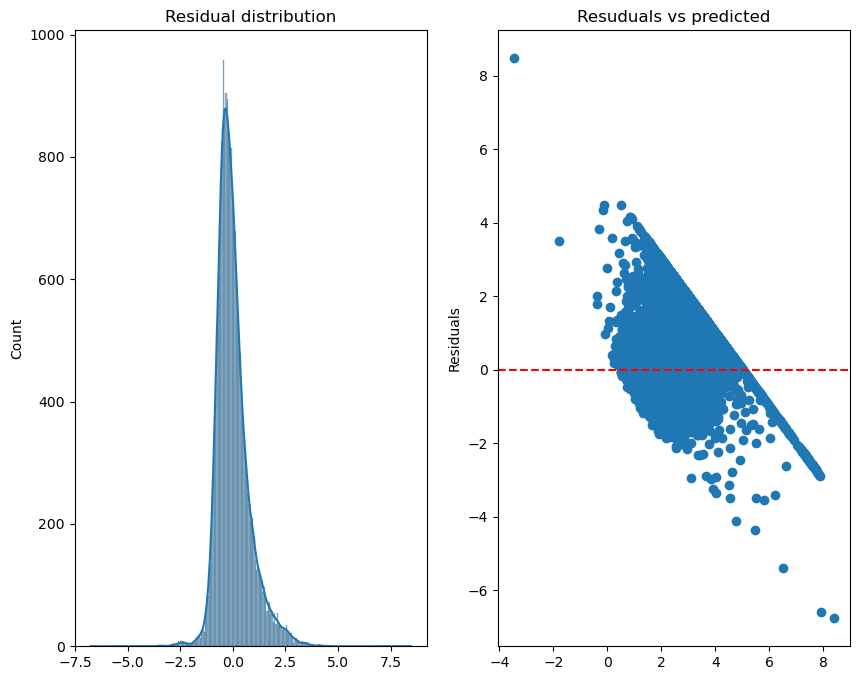

model coefficiants:
 const        -0.439093
MedInc        0.536910
HouseAge      0.016503
AveRooms     -0.211740
AveBedrms     0.993730
Population    0.000022
AveOccup     -0.004877
dtype: float64


In [20]:
residuals=model.resid
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.histplot(residuals,kde=True)
plt.title('Residual distribution')
plt.subplot(1,2,2)
plt.scatter(model.predict(x),residuals)
plt.axhline(y=0,color='red',linestyle='--')
plt.title('Resuduals vs predicted')
plt.ylabel('Residuals')
plt.show()
print('model coefficiants:\n',model.params)

In [21]:
from sklearn.metrics import mean_squared_error,r2_score
predictions=model.predict(x)
print("R square error",r2_score(y,predictions))
print("MSE",mean_squared_error(y,predictions))

R square error 0.5396977345638283
MSE 0.6129156196698703


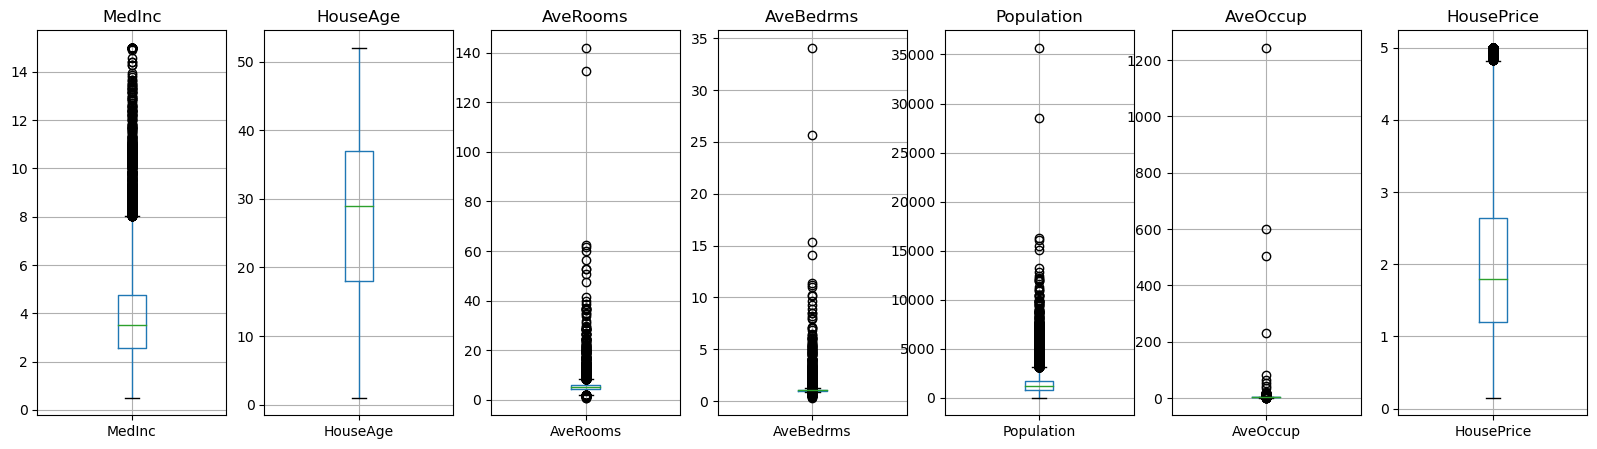

In [22]:
import matplotlib.pyplot as plt
def plot_boxplot(df):
    fig,axes=plt.subplots(1,len(df.columns),figsize=(20,5))
    for i,column_name in enumerate(df.columns):
        df.boxplot(column=column_name,ax=axes[i])
        axes[i].set_title(column_name)
        
plt.show()
plot_boxplot(housing_df)

In [26]:
def remove_outliers(df):
    df_no_outliers = df.copy()
    
    for column_name in df.columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_no_outliers[column_name] = df_no_outliers[column_name].apply(
            lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
        )
    
    # Correct placement of the return statement
    return df_no_outliers


In [30]:
housing_df_new = remove_outliers(housing_df)

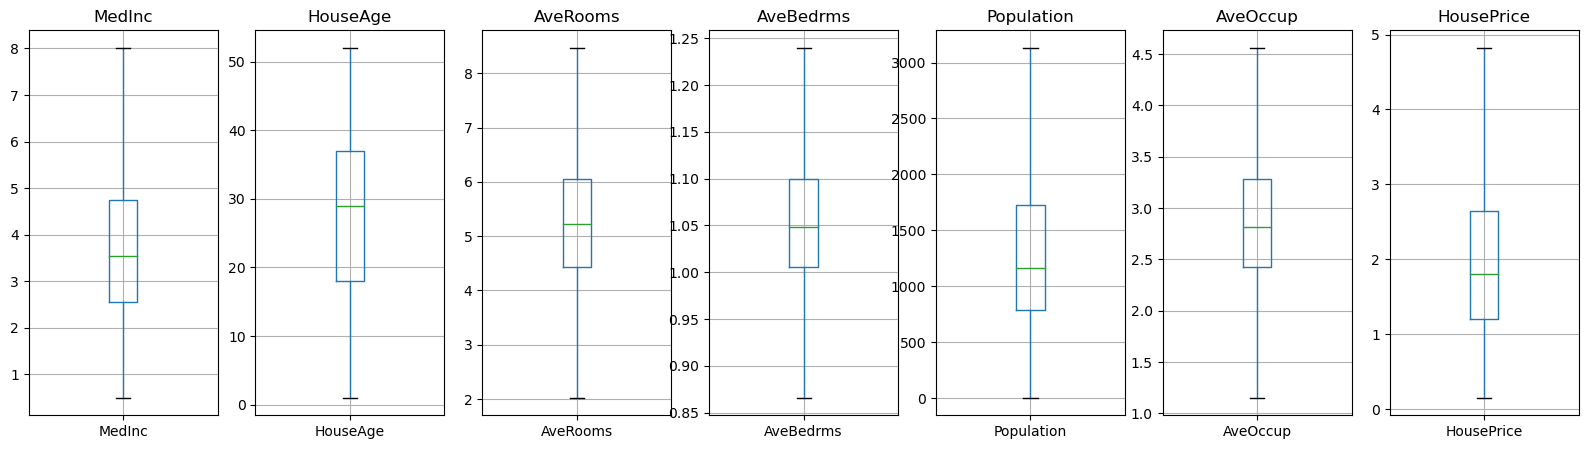

In [28]:
plot_boxplot(housing_df_new)


In [31]:
cols_to_convert=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']
housing_df_new[cols_to_convert]=housing_df_new[cols_to_convert].apply(pd.to_numeric,errors='coerce')
housing_df_new['HousePrice']=pd.to_numeric(housing_df_new['HousePrice'],errors='coerce')
x=sm.add_constant(housing_df_new.drop('HousePrice',axis=1))
y=housing_df_new['HousePrice']
model=sm.OLS(y,x).fit()

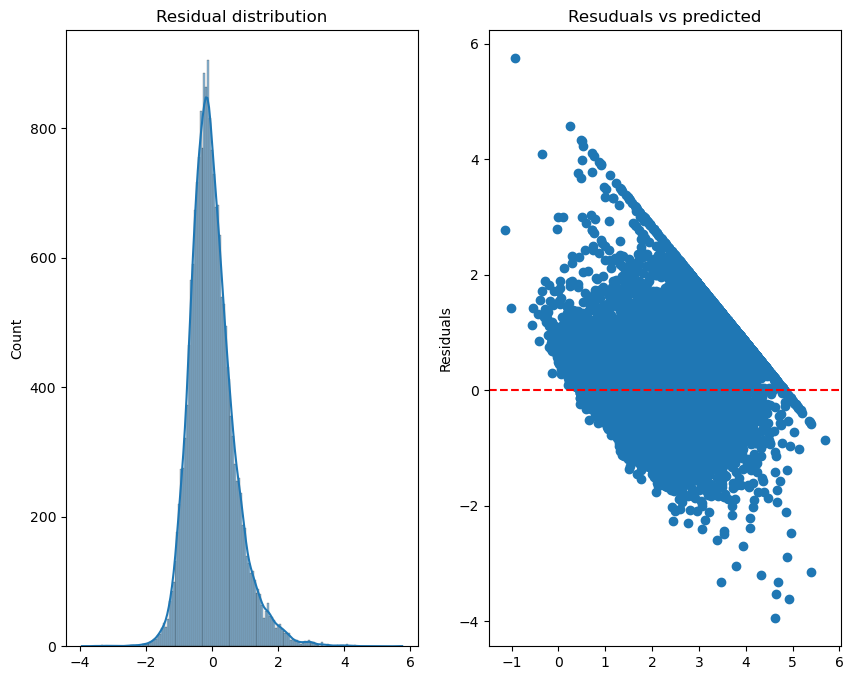

model coefficiants:
 const        -1.025744
MedInc        0.634138
HouseAge      0.018696
AveRooms     -0.258632
AveBedrms     2.308808
Population    0.000079
AveOccup     -0.357348
dtype: float64


In [32]:
residuals=model.resid
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.histplot(residuals,kde=True)
plt.title('Residual distribution')
plt.subplot(1,2,2)
plt.scatter(model.predict(x),residuals)
plt.axhline(y=0,color='red',linestyle='--')
plt.title('Resuduals vs predicted')
plt.ylabel('Residuals')
plt.show()
print('model coefficiants:\n',model.params)

In [33]:
from sklearn.metrics import mean_squared_error,r2_score
predictions=model.predict(x)
print("R square error",r2_score(y,predictions))
print("MSE",mean_squared_error(y,predictions))

R square error 0.617696810976802
MSE 0.4900189223577003


Thank you 